# Pymaceuticals Inc.
---

### Analysis

- For mouse l509, the Capomulin treatment was effective in decreasing the tumor volume.
- Overall, Capomulin and Ramicine were more effective at reducing overall tumor volume when compared to Infubinol and Ceftamin.
- In final analysis, there is a positive coorelation between the mouse's weight and average tumor volume under the drug regimen of Capomulin.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mouse_data = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
merged_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merged_mouse_data["Mouse ID"].value_counts()

g989    13
o795    10
q633    10
a897    10
a401    10
        ..
v199     1
l872     1
n482     1
b447     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_index = merged_mouse_data.set_index('Mouse ID')
clean_index.loc['g989']


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mousedata_df = clean_index.drop(['g989'])


In [5]:
#reset index
reset_index_clean_mousedata_df = clean_mousedata_df.reset_index()

In [6]:
# Checking the number of mice in the clean DataFrame.
reset_index_clean_mousedata_df['Mouse ID'].value_counts()

o795    10
m546    10
a275    10
c139    10
o331    10
        ..
x226     1
u153     1
v199     1
x336     1
o848     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mousedata_df = reset_index_clean_mousedata_df
tumor = mousedata_df.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = tumor["Tumor Volume (mm3)"].mean()
tumor_median = tumor["Tumor Volume (mm3)"].median()
tumor_var = tumor["Tumor Volume (mm3)"].var()
tumor_std = tumor["Tumor Volume (mm3)"].std()
tumor_sem = tumor["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
tumor_stat_df = pd.DataFrame({
                "Mean": tumor_mean,
                "Median":tumor_median,
                "Variance":tumor_var,
                "Standard Deviation":tumor_std,
                "Tumor SEM":tumor_sem
    
})
tumor_stat_df

,Mean,Median,Variance,Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor_2 = mousedata_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].agg(["mean", "median", "var", "std", "sem"])
tumor_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

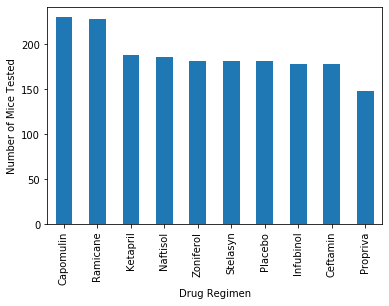

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
by_timepoint = mousedata_df.groupby(['Drug Regimen'])['Timepoint'].count()
by_timepoint.sort_values(ascending=False).plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

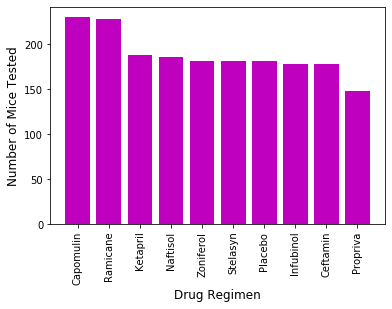

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_pyplot = by_timepoint.sort_values(ascending=False)
plt.bar(timepoint_pyplot.index, timepoint_pyplot.values, color='m')
plt.xlabel("Drug Regimen", size=12)
plt.ylabel("Number of Mice Tested", size=12)
plt.xticks(rotation='vertical')
plt.show()

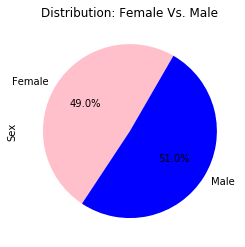

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
by_sex = mousedata_df.groupby(['Sex'])['Sex'].count()
by_sex.plot.pie(autopct='%1.1f%%', startangle=60, title="Distribution: Female Vs. Male", colors=['pink','blue'])



Text(0.5, 1.0, 'Distribution: Female Vs. Male')

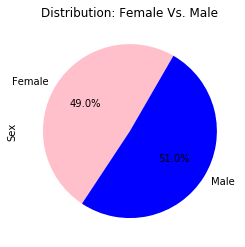

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(by_sex, labels=("Female","Male"), startangle=60, autopct='%1.1f%%', colors=['pink','blue'])
plt.ylabel('Sex')
plt.title("Distribution: Female Vs. Male")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = (mousedata_df.groupby(['Mouse ID'])['Timepoint'].max().sort_values())
max_timepoint_df = pd.DataFrame(max_timepoint)
max_timepoint_df.reset_index().rename(columns={'Timepoint':'max_timepoint'})
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_merged_mousedata = pd.merge(max_timepoint_df, mousedata_df, on=("Mouse ID", "Timepoint"))
final_merged_mousedata

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b447,0,Ceftamin,Male,2,30,45.000000,0
1,x226,0,Ceftamin,Male,23,28,45.000000,0
2,f932,0,Ketapril,Male,15,29,45.000000,0
3,x336,0,Naftisol,Female,4,29,45.000000,0
4,l872,0,Placebo,Male,19,30,45.000000,0
...,...,...,...,...,...,...,...,...
243,k894,45,Zoniferol,Female,13,29,60.752704,4
244,l471,45,Ceftamin,Female,7,28,67.748662,1
245,l509,45,Capomulin,Male,17,21,41.483008,3
246,i177,45,Ramicane,Male,10,18,33.562402,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatment_values =[]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    treatment_df = final_merged_mousedata.loc[final_merged_mousedata["Drug Regimen"] == treatment]
    
    # add subset 
    final_volume_df = treatment_df.loc[treatment_df['Timepoint'] == treatment_df['Timepoint']]
    values = final_volume_df["Tumor Volume (mm3)"]
    treatment_values.append(values)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = values.quantile([.25,.5,.75])
    lower_quartile = quartiles[.25]
    upper_quartile = quartiles[.75]
    IQR = upper_quartile - lower_quartile


# Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5*IQR)
    upper_bound = upper_quartile + (1.5*IQR)

    outliers = (values.loc[(final_volume_df["Tumor Volume (mm3)"] >= upper_bound) |
                          (final_volume_df["Tumor Volume (mm3)"]<= lower_bound)])
    outliers.count()
    print(f'{treatment} potential outliers: {outliers}')

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 19    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(*args, **kw)>

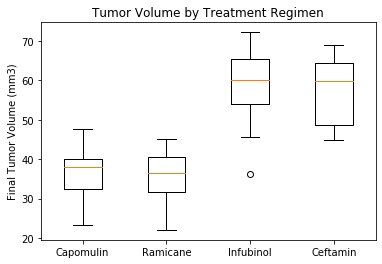

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(treatment_values)
plt.title("Tumor Volume by Treatment Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1,2,3,4],["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] )

plt.show

## Line and Scatter Plots

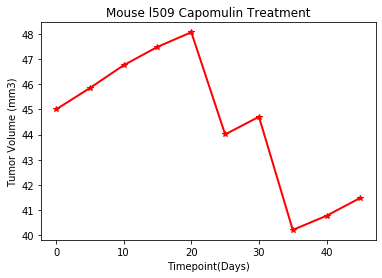

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
treated_mouse = mousedata_df.loc[mousedata_df["Mouse ID"] == "l509"]
#x axis
x_axis = treated_mouse["Timepoint"]
#y axis
y_axis = treated_mouse["Tumor Volume (mm3)"]
plt.title("Mouse l509 Capomulin Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint(Days)")
plt.plot(x_axis, y_axis, color='r', marker='*', linewidth=2)
plt.show()

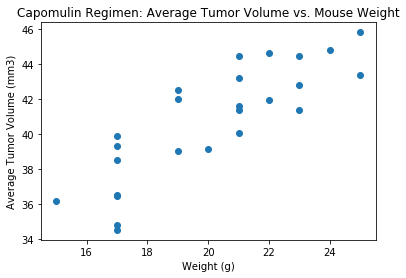

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_df = mousedata_df.loc[mousedata_df["Drug Regimen"] == "Capomulin"]
capo_avg = capo_df.groupby(["Mouse ID"]).mean()

plt.scatter(capo_avg["Weight (g)"], capo_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Regimen: Average Tumor Volume vs. Mouse Weight")
plt.show()

## Correlation and Regression

The coorelation between mouse weight and average tumor volume is 0.84.


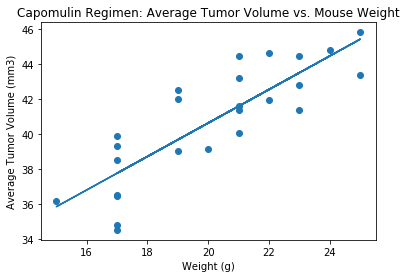

In [51]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
coorelation = round(st.pearsonr(capo_avg["Weight (g)"], capo_avg["Tumor Volume (mm3)"])[0],2)
print(f'The coorelation between mouse weight and average tumor volume is {coorelation}.')

linear_regression = st.linregress(capo_avg["Weight (g)"], capo_avg["Tumor Volume (mm3)"])
linear_regression

#linear regression model
#line formula y=mx+b
slope=0.9544396890241047
intercept=21.55216053268501
line = slope*(capo_avg["Weight (g)"])+intercept
capo_df = mousedata_df.loc[mousedata_df["Drug Regimen"] == "Capomulin"]
capo_avg = capo_df.groupby(["Mouse ID"]).mean()

plt.scatter(capo_avg["Weight (g)"], capo_avg["Tumor Volume (mm3)"])
plt.plot(capo_avg["Weight (g)"], line)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Regimen: Average Tumor Volume vs. Mouse Weight")
plt.show()